In [1]:
import numpy as np
import scipy.stats
import math

Рассчитайте 99% доверительный интервал для следующего примера:

x¯=10

sd=5

n=100

<img src="files/ci.png" />

In [2]:
def confidence_interval(sd, X, N, target_interval):
    '''
    Поиск доверительного интервала
    target_interval - точность (обычно 95% - 99%)
    N - выборка
    sd - среднее отклонение
    X - среднее
    '''
    alpha = 1 - target_interval
    z = abs(scipy.stats.norm.ppf(alpha/2))
    se = sd / math.sqrt(N)
    return (round(X - z * se, 2), round(X + z * se, 2))

In [3]:
confidence_interval(5, 10, 100, 0.99)

(8.71, 11.29)

<img src="files/di_test.png" />

In [4]:
confidence_interval(4, 18.5, 64, 0.95)

(17.52, 19.48)

<img src="files/tv-task.png" />

In [5]:
# use previous method
print(confidence_interval(11.3, 89.9, 19, 0.95))

# and use t-value
print(round(89.9 - 2.093 * 11.3 / math.sqrt(20), 2), round(89.9 + 2.093 * 11.3 / math.sqrt(20), 2))

(84.82, 94.98)
(84.61, 95.19)


# A one-way ANOVA

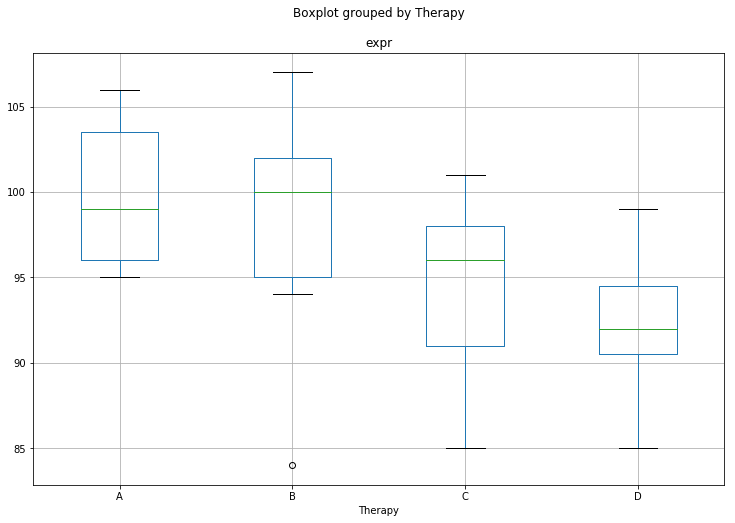

In [6]:
import pandas as pd
%matplotlib inline

data = pd.read_csv('data/genetherapy.csv', sep=',')
data.boxplot('expr', by='Therapy', figsize=(12, 8), grid=True)

In [7]:
grps = pd.unique(data.Therapy.values)
d_data = { grp:data['expr'][data.Therapy == grp] for grp in grps }
print(d_data.keys())

['A', 'C', 'B', 'D']


In [8]:
F, p = scipy.stats.f_oneway(d_data['A'], d_data['B'], d_data['C'], d_data['D'])
print((F, p))

(8.0373024811439908, 0.00015249722895229536)


# A 2-way ANOVA

In [9]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.tools import FigureFactory as FF

import numpy as np
import pandas as pd
import scipy

import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols

import warnings
warnings.filterwarnings('ignore')

/home/artem/.virtualenvs/research/local/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning:

The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.



                     sum_sq    df         F    PR(>F)
C(age)           197.452754   1.0  7.449841  0.008313
C(dose)           16.912241   1.0  0.638094  0.427552
C(age):C(dose)     0.927077   1.0  0.034978  0.852272
Residual        1590.257424  60.0       NaN       NaN


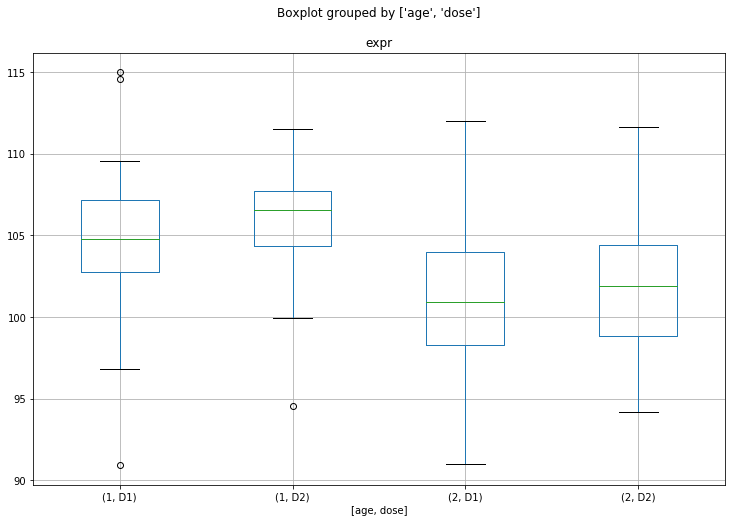

In [10]:
data = pd.read_csv('data/atherosclerosis.csv')

formula = 'expr ~ C(age) + C(dose) + C(age):C(dose)'
model = ols(formula, data).fit()
aov_table = statsmodels.stats.anova.anova_lm(model, typ=2)
print(aov_table)
data.boxplot('expr', by=['age', 'dose'], figsize=(12, 8), grid=True)

                       sum_sq    df         F    PR(>F)
C(hormone)           0.847472   1.0  0.086528  0.769653
C(sex)               0.119762   1.0  0.012228  0.912318
C(hormone):C(sex)   89.483384   1.0  9.136390  0.003682
Residual           587.650394  60.0       NaN       NaN


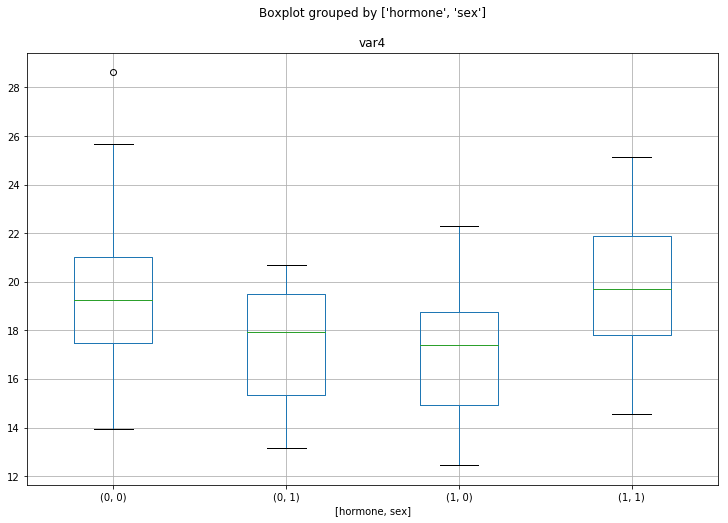

In [11]:
data = pd.read_csv('data/birds.csv')

formula = 'var4 ~ C(hormone) + C(sex) + C(hormone):C(sex)'
model = ols(formula, data).fit()
aov_table = statsmodels.stats.anova.anova_lm(model, typ=2)
print(aov_table)
data.boxplot('var4', by=['hormone', 'sex'], figsize=(12, 8), grid=True)

<img src="files/korelation.png" />

Scipy result: -1.000000
Numpy result: -1.000000


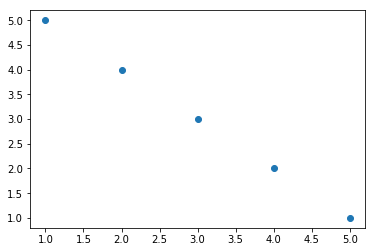

In [12]:
import matplotlib.pyplot as plt

x = [4, 5, 2, 3, 1]
y = [2, 1, 4, 3, 5]

print("Scipy result: %f" % scipy.stats.pearsonr(x, y)[0])
print("Numpy result: %f" % np.corrcoef(x, y)[0, 1])

plt.plot(x, y, 'o')

# Линейная регрессия

<img src="files/метод наименьших квадратов.png" />

In [13]:
# first task in regression module:

<img src="files/regression_task1.png" />

In [14]:
# sdx = math.sqrt(Dx)
b1 = (math.sqrt(36) / math.sqrt(25)) * 0.5

print(b1)

0.6


# Применение регрессионного анализа

с одной независимой переменной

In [110]:
data = pd.read_csv('data/states.csv')
data[0:3]
# metro_res - does it big city or megapolis
# white - percent of white people
# hs_grad - was graduated
# poverty - how pure is people
# female_house - how many female is unemployed.

,state,metro_res,white,hs_grad,poverty,female_house
0,Alabama,55.4,71.3,79.9,14.6,14.2
1,Alaska,65.6,70.8,90.6,8.3,10.8
2,Arizona,88.2,87.7,83.8,13.3,11.1


b1 is: -0.621217


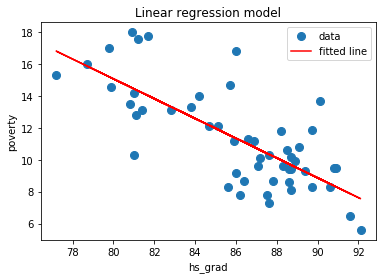

In [121]:
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(data['hs_grad'], data['poverty'])

print("b1 is: %f" % slope)

plt.title("Linear regression model")
plt.xlabel("hs_grad")
plt.ylabel("poverty")
plt.plot(data['hs_grad'], data['poverty'], 'o', markersize="8", label='data')
plt.plot(data['hs_grad'], intercept + slope*data['hs_grad'], 'r', label='fitted line')
plt.legend()
plt.show()

# Множественная регресссия

In [131]:
data.head()

,state,metro_res,white,hs_grad,poverty,female_house
0,Alabama,55.4,71.3,79.9,14.6,14.2
1,Alaska,65.6,70.8,90.6,8.3,10.8
2,Arizona,88.2,87.7,83.8,13.3,11.1
3,Arkansas,52.5,81.0,80.9,18.0,12.1
4,California,94.4,77.5,81.1,12.8,12.6


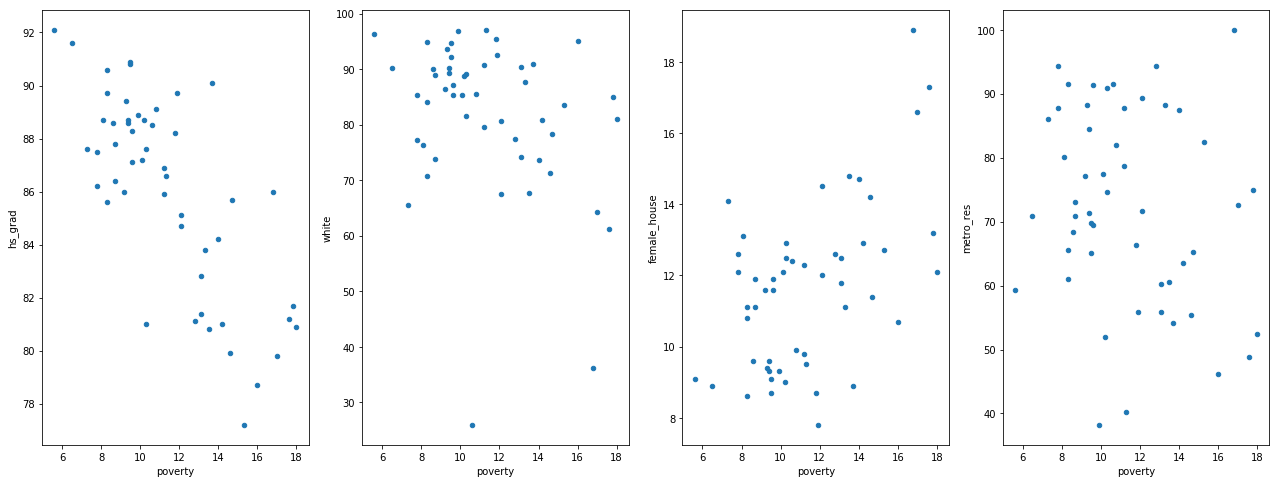

In [165]:
fig, axs = plt.subplots(1, 4, sharey=False)
data.plot(kind='scatter', x='poverty', y='hs_grad', ax=axs[0], figsize=(22, 8))
data.plot(kind='scatter', x='poverty', y='white', ax=axs[1])
data.plot(kind='scatter', x='poverty', y='female_house', ax=axs[2])
data.plot(kind='scatter', x='poverty', y='metro_res', ax=axs[3])

In [160]:
import statsmodels.formula.api as smf

# create a fitted model with all three features
lm = smf.ols(formula='poverty ~ metro_res + white + hs_grad + female_house', data=data).fit()

# print the coefficients
lm.params

Intercept       66.476525
metro_res       -0.056323
white           -0.048144
hs_grad         -0.554713
female_house     0.050543
dtype: float64

In [161]:
# print a summary of the fitted model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                poverty   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     20.58
Date:                Thu, 18 May 2017   Prob (F-statistic):           8.88e-10
Time:                        17:09:45   Log-Likelihood:                -103.39
No. Observations:                  51   AIC:                             216.8
Df Residuals:                      46   BIC:                             226.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       66.4765     12.590      5.280      0.000      41.134      91.819
metro_res       -0.0563      0.020     -2.881      0.006      -0.096      -0.017
white           -0.0481      0.033     -1.456      0.152      -0.115       0.018
hs_grad         -0.5547      0.105     -5.288      0.000      -0.766      -0.344
female_house     0.0505      0.243      0.208      0.836      -0.439       0.540
==============================================================================
Omnibus:                        3.254   Durbin-Watson:                   1.891
Prob(Omnibus):                  0.197   Jarque-Bera (JB):                3.043
Skew:                           0.585   Prob(JB):                        0.218
Kurtosis:                       2.750   Cond. No.                     6.50e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [179]:
# try to build better model by increasing Adj. R-squared by removing different values
lm1 = smf.ols(formula='poverty ~ metro_res + white + hs_grad', data=data).fit()
lm2 = smf.ols(formula='poverty ~ metro_res + hs_grad + female_house', data=data).fit()
lm3= smf.ols(formula='poverty ~ white + hs_grad + female_house', data=data).fit()
lm4 = smf.ols(formula='poverty ~ metro_res + white + female_house', data=data).fit()
(lm1.rsquared_adj, lm2.rsquared_adj, lm3.rsquared_adj, lm4.rsquared_adj)

# lm1.rsquared_adj is best model beacuse value is biggest

(0.61834007507441036,
 0.60112277789143176,
 0.54989845418848426,
 0.38693458508131862)

In [181]:
# we can try to make it much better in same way with new model
lm1 = smf.ols(formula='poverty ~ metro_res + white', data=data).fit()
lm2 = smf.ols(formula='poverty ~ metro_res + hs_grad', data=data).fit()
lm3 = smf.ols(formula='poverty ~ white + hs_grad', data=data).fit()
(lm1.rsquared_adj, lm2.rsquared_adj, lm3.rsquared_adj)

# there is no better model because all is less than previous value, so we stick with last where
# Adj. R-squared was equal 0.62 - 'poverty ~ metro_res + white + hs_grad'

(0.17080221297932097, 0.57726982189993647, 0.5582222691253651)

In [183]:
lm = smf.ols(formula='poverty ~ metro_res + white + hs_grad', data=data).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                poverty   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     28.00
Date:                Thu, 18 May 2017   Prob (F-statistic):           1.55e-10
Time:                        18:02:34   Log-Likelihood:                -103.41
No. Observations:                  51   AIC:                             214.8
Df Residuals:                      47   BIC:                             222.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     68.7220      6.389     10.756      0.000      55.869      81.575
metro_res     -0.0555      0.019     -2.926      0.005      -0.094      -0.017
white         -0.0533      0.021     -2.483      0.017      -0.097      -0.010
hs_grad       -0.5697      0.075     -7.569      0.000      -0.721      -0.418
==============================================================================
Omnibus:                        3.479   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.176   Jarque-Bera (JB):                3.230
Skew:                           0.607   Prob(JB):                        0.199
Kurtosis:                       2.787   Cond. No.                     3.32e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.32e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""